<h4>Implement a linear regression model to predict housing prices based on a given dataset.</h4>
Expected Output:<br>
Load a dataset the Boston Housing dataset.<br>
Train a linear regression model.<br>
Print the model's coefficients and intercept.<br>
Predict housing prices on a test set and print the mean squared error.<br>
Visualize the regression line and data points.


# import all important  libraries

<h4>numpy:</h4> Used for numerical operations and handling arrays.
<h4>pandas: </h4>Used for data manipulation and analysis.
<h4>fetch_openml:</h4> Used to fetch the Boston Housing dataset from OpenML.
<h4>train_test_split: </h4>Used to split the dataset into training and testing sets.
<h4>LinearRegression:</h4> Used to create and train a linear regression model.
<h4>mean_squared_error: </h4>Used to calculate the mean squared error of the model's predictions.
<h4>matplotlib.pyplot: </h4>Used to create visualizations, such as scatter plots and regression lines.

In [10]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


<h4>fetch_openml:</h4> Loads the Boston Housing dataset from OpenML as a pandas DataFrame.
<h4>df::</h4> Stores the DataFrame containing the feature data.
<h4>df['PRICE']::</h4> Adds the target variable (house prices) as a new column named 'PRICE' in the DataFrame.

In [11]:
boston = fetch_openml(name='boston', version=1, as_frame=True)
df = boston.frame
df['PRICE'] = boston.target

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


<h4>X = df[['RM']]:</h4> Selects the 'RM' (average number of rooms per dwelling) column from the DataFrame and stores it in X.
<h4>y = df['PRICE']:</h4> Selects the 'PRICE' (house prices) column from the DataFrame and stores it in y.
<h4>print(X): </h4>Prints the DataFrame X, showing the number of rooms per dwelling.
<h4>print(y):</h4> Prints the Series y, showing the house prices.

In [18]:
X = df[['RM']] 
y = df['PRICE']
print(X)
print(y)

        RM
0    6.575
1    6.421
2    7.185
3    6.998
4    7.147
..     ...
501  6.593
502  6.120
503  6.976
504  6.794
505  6.030

[506 rows x 1 columns]
0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64


<h4>train_test_split: </h4>Splits the dataset into training and testing sets.
<h4>test_size=0.2: </h4>20% of the data is used for testing, and 80% is used for training.
<h4>random_state=42</h4>: Ensures reproducibility of the data split.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

        RM
477  5.304
15   5.834
332  6.031
423  6.103
19   5.727
..     ...
106  5.836
270  5.856
348  6.635
435  6.629
102  6.405

[404 rows x 1 columns]
        RM
173  6.416
274  6.758
491  5.983
72   6.065
452  6.297
..     ...
412  4.628
436  6.461
411  6.657
86   6.015
75   6.286

[102 rows x 1 columns]
477    12.0
15     19.9
332    19.4
423    13.4
19     18.2
       ... 
106    19.5
270    21.1
348    24.5
435    13.4
102    18.6
Name: PRICE, Length: 404, dtype: float64
173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
412    17.9
436     9.6
411    17.2
86     22.5
75     21.4
Name: PRICE, Length: 102, dtype: float64


<h4>model = LinearRegression():</h4>
Creates an instance of the linear regression model.
<h4>model.fit(X_train, y_train):</h4>
Trains the linear regression model using the training data (X_train and y_train).

In [21]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

<h4>Coefficients:</h4> he slopes of the linear regression line for each feature. <br>In this case, since we are using only one feature ('RM'), this will print the coefficient for the 'RM' feature.
<h4>Intercept: </h4>The y-intercept of the linear regression line. This is the value of the target variable<br> (house price) when all the feature values are zero.

In [22]:
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')


Coefficients: [9.34830141]
Intercept: -36.24631889813795


<h4>y_pred = model.predict(X_test):</h4>

Uses the trained model to predict house prices based on the test set features (X_test).<br>
Stores the predictions in y_pred.
<h4>print(y_pred):</h4>

Prints the array of predicted house prices.

In [24]:
y_pred = model.predict(X_test)
print(y_pred)

[23.73238293 26.92950201 19.68456842 20.45112913 22.61993506 22.45166563
 19.03953562 21.47009399 21.98425056 20.09589368 19.38542277 19.88088275
  5.99865516 22.01229547 17.11378553 29.00482492 18.71234507  9.37339197
 37.37155468 21.5729253  22.08708188 24.34937082 17.16052704 25.38703227
 19.89957935 14.48691283 18.66560356 26.64905296 19.46955748 17.91773945
 15.84241654 23.82586594 32.11780929 13.87927324 19.87153445 17.12313383
 30.92122671 18.61886206 20.44178083 22.13382339 14.14102568 27.78019743
 38.8579346  16.04807917 23.74173123 17.16052704 17.04834742 23.74173123
 21.40465588 25.21876285 19.92762425 28.8926453  21.17094834 27.14451294
 33.58549261 22.76015958 21.89076755 27.89237705 23.47997879 16.15091049
 26.96689521 31.519518   25.00375192 14.75801358 25.25615606 13.71100382
 24.2465395  22.66667657 25.40572888 19.61913031 17.84295304 26.8547156
 18.47863754 19.24519825 21.15225174 14.72996867 21.40465588 37.16589205
 24.93831381 14.36538492 18.76843488 16.2630901  18.

<h4>mse = mean_squared_error(y_test, y_pred):</h4>

Computes the mean squared error between the actual house prices (y_test) and the predicted house prices (y_pred).<br>
Stores the computed MSE value in mse.
<h4>print(f'Mean Squared Error: {mse}'):</h4>

Prints the calculated mean squared error value.

In [25]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 46.144775347317264


<h4>plt.scatter(X_test, y_test, ...):</h4> Plots actual house prices as blue dots against the number of rooms.
<h4>plt.plot(X_test, y_pred, ...):</h4> Plots predicted house prices as a red line based on the number of rooms.
<h4>plt.xlabel, plt.ylabel, plt.title:</h4> Sets labels and title for the plot.
<h4>plt.legend:</h4> Displays a legend to distinguish between actual data points and the regression line.
<h4>plt.show():</h4> Displays the plot with all specified elements.
This plot provides a visual representation of how well the linear regression model predicts house prices based on the number of rooms.

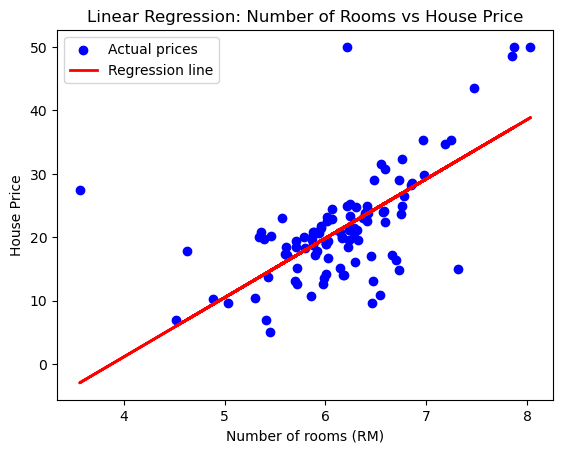

In [26]:
plt.scatter(X_test, y_test, color='blue', label='Actual prices')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel('Number of rooms (RM)')
plt.ylabel('House Price')
plt.title('Linear Regression: Number of Rooms vs House Price')
plt.legend()
plt.show()